# Applying K-means Clustering Mechanism to TTE-V1

In [2]:
import pandas as pd

df = pd.read_csv("csv/data_censored.csv")  
df.head() 

,id,period,treatment,x1,x2,x3,x4,age,age_s,outcome,censored,eligible
0,1,0,1,1,1.146148,0,0.734203,36,0.083333,0,0,1
1,1,1,1,1,0.002200,0,0.734203,37,0.166667,0,0,0
2,1,2,1,0,-0.481762,0,0.734203,38,0.250000,0,0,0
3,1,3,1,0,0.007872,0,0.734203,39,0.333333,0,0,0
4,1,4,1,1,0.216054,0,0.734203,40,0.416667,0,0,0


Index(['id', 'period', 'treatment', 'x1', 'x2', 'x3', 'x4', 'age', 'age_s',
       'outcome', 'censored', 'eligible'],
      dtype='object')


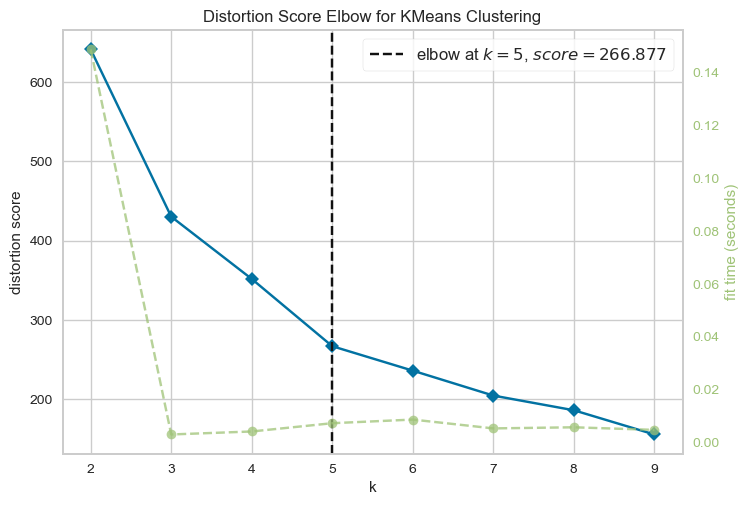

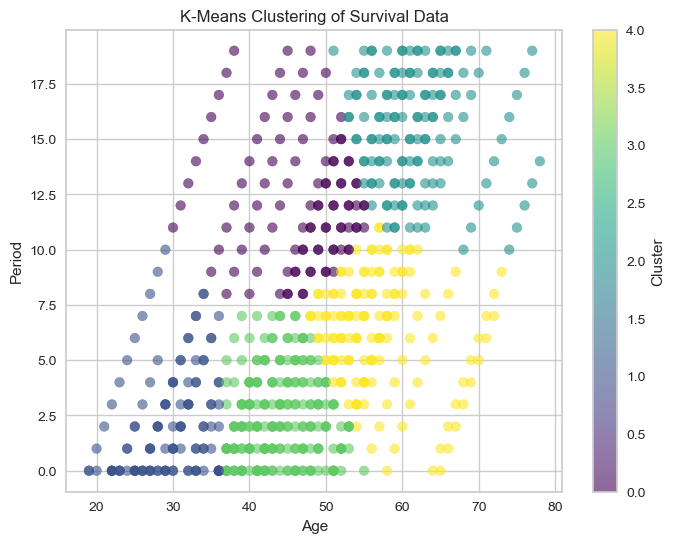

               age     period
Cluster                      
0        46.291262  12.320388
1        29.535088   2.245614
2        61.899281  15.460432
3        43.963964   2.414414
4        56.931973   6.136054


In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "3"

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

# Load dataset
df = pd.read_csv("csv/data_censored.csv")  # Ensure this file is in the correct path

# Check available columns
print(df.columns)  # Helps confirm column names

# Choose relevant features for clustering
features = ['age', 'period']  # Adjust based on event-related columns
df_filtered = df[features].dropna()  # Drop missing values

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filtered)

# Determine the optimal number of clusters using the Elbow Method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df_scaled)
visualizer.show()

# Apply K-Means clustering with the optimal k
optimal_k = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_filtered['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clusters
plt.figure(figsize=(8,6))
plt.scatter(df_filtered['age'], df_filtered['period'], c=df_filtered['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Period')  # Update label based on selected column
plt.title('K-Means Clustering of Survival Data')
plt.colorbar(label="Cluster")
plt.show()

# Display cluster statistics
print(df_filtered.groupby("Cluster").mean())


# **Clustering Insights**

## **1️⃣ Understanding the Elbow Method**
- The optimal number of clusters (`k = 5`) was chosen using the **Elbow Method**.
- This means the dataset is best grouped into **5 clusters** for meaningful segmentation.

---

## **2️⃣ Cluster Characteristics**
Each row represents a **cluster’s average values for `age` and `period`**:

| Cluster | Avg. Age | Avg. Period |
|---------|---------|-------------|
| **0**  | 46.29   | 12.32       |
| **1**  | 29.53   | 2.45        |
| **2**  | 61.89   | 15.46       |
| **3**  | 43.96   | 2.41        |
| **4**  | 56.93   | 6.13        |

---

## **3️⃣ Insights from the Scatter Plot & Table**
- **Cluster 1 (Youngest group, avg. age = 29.5, short period ≈ 2.45)**
  - Suggests **higher risk** and shorter survival.
  - Could be due to a specific treatment, lifestyle, or condition.

- **Cluster 2 (Oldest group, avg. age = 61.9, longest period ≈ 15.46)**
  - Indicates **lower risk**, possibly responding well to treatments.

- **Cluster 3 (Middle-aged, avg. age = 43.9, short period ≈ 2.41)**
  - Similar survival to younger individuals, suggesting **a possible risk factor in middle-aged groups**.

- **Cluster 4 (Older, avg. age = 56.9, moderate period ≈ 6.13)**
  - Might indicate a **transitional risk group** (not as low-risk as Cluster 2 but not as high-risk as Cluster 1).

- **Cluster 0 (Middle-aged, avg. age = 46.2, relatively long survival ≈ 12.32)**
  - Possibly benefiting from certain treatments or conditions.

---

## **4️⃣ Key Takeaways**
✔️ **Younger individuals tend to have the shortest survival times.**  
✔️ **Older individuals (Cluster 2) have the longest survival times.**  
✔️ **Middle-aged groups (Clusters 3 & 4) may have specific risk factors.**  
✔️ **If treatment data (`treatment`, `outcome`) is included, we may find better explanations for these patterns.**  

---

## **5️⃣ Next Steps & Refinements**
- **Include other features (`treatment`, `outcome`, `x1-x4`)** to refine clusters further.  
- **Run statistical tests** to check if age significantly affects survival time.  
- **Try hierarchical clustering** to validate results.  

---

🚀 *These insights help us understand patterns in survival times across different age groups. Further analysis can reveal underlying causes for these differences!*
